<a href="https://colab.research.google.com/github/jakeTHEEsnak8/Computational-Physics/blob/main/projects/P8_Visualizing_Electric_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P8 Visualizing Electric Fields

For an arbitrary set of charges each with a specified position, create a Python program to calculate and plot the streamlines showing the resulting electric field. As an example, choose 4 charges with positive and negative charges. Describe the geometry of the field and why it either makes sense or doesn't make sense given the charges. Try a few different charge distributions. What can you learn from these visualizations?

In [ ]:
import numpy as np

#called a function to create a set of charges based off configuration
def define_charges(charge_configs):
    """
    Args:
        charge_configs (list): A list of dictionaries, where each dictionary
                               represents a charge and contains 'x', 'y', and 'q'
                               keys for position and magnitude.

    Returns:
        list: A list of dictionaries, each representing a charge with its
              'x', 'y', and 'q' values.
    """
    charges = [] #creates an empty list of charges to later be created by a for loop
                    #defining it based on location on the grid
    for config in charge_configs:
        charges.append({
            'x': config['x'],
            'y': config['y'],
            'q': config['q']
        })
    return charges #from the gemini comment it will return the the respective charge
                    #and where its located

print("Function 'define_charges' created successfully.")

Function 'define_charges' created successfully.


In [ ]:
def calculate_electric_field(charges, grid):
    """
    Calculates the electric field vector (Ex, Ey components) at each point on a grid.

    Args:
        charges (list): A list of dictionaries, where each dictionary represents a charge
                        and contains 'x', 'y', and 'q' keys for position and magnitude.
        grid (tuple): A tuple (X, Y) where X and Y are 2D NumPy arrays representing
                      the x and y coordinates of the grid points.

    Returns:
        tuple: A tuple (Ex, Ey) containing 2D NumPy arrays for the x and y components
               of the total electric field at each grid point.
    """
    X, Y = grid
    Ex = np.zeros_like(X)
    Ey = np.zeros_like(Y)

    # Coulomb's constant (for relative calculations, units not critical for visualization)
    k = 8.99e9 # Or use 8.9875e9 for SI units if needed

    for charge in charges:
        qx, qy, q = charge['x'], charge['y'], charge['q']

        # Calculate distance vectors from charge to each grid point
        rx = X - qx
        ry = Y - qy

        # Calculate distance magnitude
        r = np.sqrt(rx**2 + ry**2)

        # Avoid division by zero for points exactly at the charge location
        # A small epsilon is used to prevent singularities
        r = np.where(r == 0, 1e-9, r)

                #np.where is a function that preforms based upon the conditions of a array

        # Calculate magnitude of electric field due to this charge
        E_magnitude = k * q / r**2

        'Coulombs Law ^'



        # Calculate x and y components of electric field due to this charge
        # E_x = E * cos(theta) = E * (rx / r)
        # E_y = E * sin(theta) = E * (ry / r)
        dEx = E_magnitude * (rx / r)
        dEy = E_magnitude * (ry / r)

        # Add components to total Ex and Ey
        Ex += dEx
        Ey += dEy           #law of superposition starts here
                                #it is within the loop so the field lines continue to add up to the total sum

    return Ex, Ey
print("Function 'calculate_electric_field' created successfully.")

Function 'calculate_electric_field' created successfully.


Four charges defined: [{'x': -1, 'y': 1, 'q': -1}, {'x': 1, 'y': 1, 'q': 1}, {'x': -1, 'y': -1, 'q': -1}, {'x': 1, 'y': -1, 'q': 1}]
Grid created with dimensions (50, 50).
Electric field components calculated.


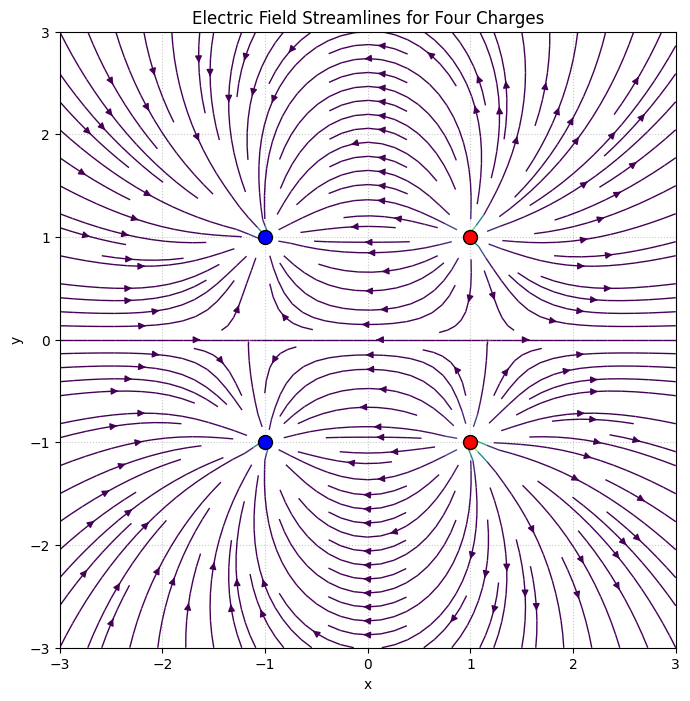

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the plotting function here, before it is called.
def plot_electric_field_streamlines(X, Y, Ex, Ey, charges, title='Electric Field Streamlines'):
    plt.figure(figsize=(8, 8))
    # Normalize the field for better visualization if values are too high
    E_mag = np.hypot(Ex, Ey)
    # Avoid division by zero in normalization
    E_mag_normalized = np.where(E_mag == 0, 1e-9, E_mag)
    # Streamlines
    plt.streamplot(X, Y, Ex, Ey, density=1.5, linewidth=1, arrowsize=1,
                   color=E_mag, cmap='viridis') # Color based on field magnitude
    # Plot charges
    for charge in charges:
        plt.scatter(charge['x'], charge['y'],
                    color='red' if charge['q'] > 0 else 'blue',
                    s=100, edgecolors='black', zorder=5) # zorder to ensure charges are on top
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.gca().set_aspect("equal")
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

# 1. Define a list of four charge configurations
charge_configs_four = [
    {'x': -1, 'y': 1, 'q': -1},   # Positive charge
    {'x': 1, 'y': 1, 'q': 1},   # Negative charge
    {'x': -1, 'y': -1, 'q': -1},  # Positive charge
    {'x': 1, 'y': -1, 'q': 1}    # Negative charge
]

# 2. Use the define_charges function to create the charges object
charges_four = define_charges(charge_configs_four)
print("Four charges defined:", charges_four)

# 3. Create a 2D grid for visualization
x_min, x_max = -3, 3.               #x and y limits for the graph
y_min, y_max = -3, 3
n_points = 50    #Data points to make the code clear and concise

x = np.linspace(x_min, x_max, n_points)
y = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x, y)

grid_four = (X, Y)
print(f"Grid created with dimensions {X.shape}.")

# 4. Call the calculate_electric_field function
Ex_four, Ey_four = calculate_electric_field(charges_four, grid_four)
print("Electric field components calculated.")

# 5. Call the plot_electric_field_streamlines function
plot_electric_field_streamlines(X, Y, Ex_four, Ey_four, charges=charges_four, title='Electric Field Streamlines for Four Charges')

**Mathematical and Physics Portions **
- As seen from above we see concepts like coulombs law and the law of superposition
- Forces are equal to eachother

Four charges defined: [{'x': -1, 'y': 1, 'q': -1}, {'x': 1, 'y': 1, 'q': -1}, {'x': -1, 'y': -1, 'q': -1}, {'x': 1, 'y': -1, 'q': -1}]
Grid created with dimensions (50, 50).
Electric field components calculated.


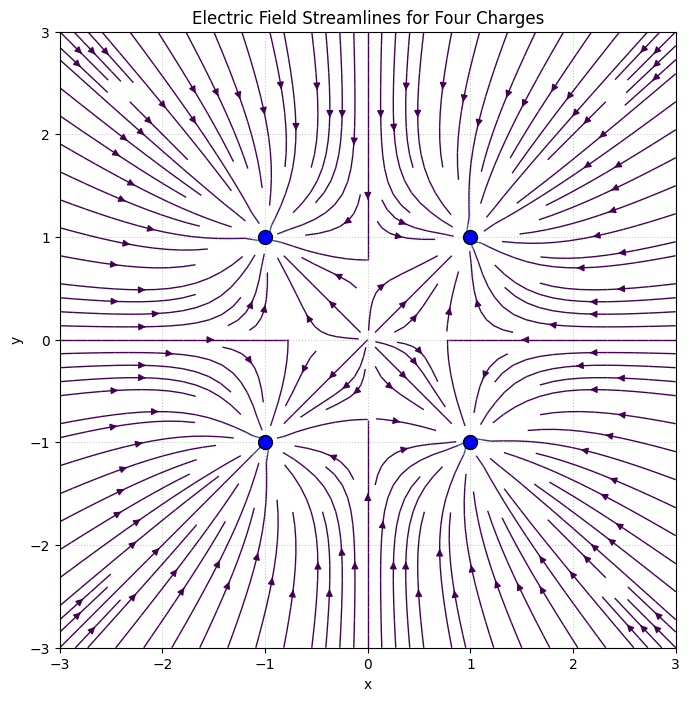

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the plotting function here, before it is called.
def plot_electric_field_streamlines(X, Y, Ex, Ey, charges, title='Electric Field Streamlines'):
    plt.figure(figsize=(8, 8))
    # Normalize the field for better visualization if values are too high
    E_mag = np.hypot(Ex, Ey)
    # Avoid division by zero in normalization
    E_mag_normalized = np.where(E_mag == 0, 1e-9, E_mag)
    # Streamlines
    plt.streamplot(X, Y, Ex, Ey, density=1.5, linewidth=1, arrowsize=1,
                   color=E_mag, cmap='viridis') # Color based on field magnitude
    # Plot charges
    for charge in charges:
        plt.scatter(charge['x'], charge['y'],
                    color='red' if charge['q'] > 0 else 'blue',
                    s=100, edgecolors='black', zorder=5) # zorder to ensure charges are on top
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.gca().set_aspect("equal")
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

# 1. Define a list of four charge configurations
charge_configs_four = [
    {'x': -1, 'y': 1, 'q': -1},
    {'x': 1, 'y': 1, 'q': -1},
    {'x': -1, 'y': -1, 'q': -1},  #  all negative
    {'x': 1, 'y': -1, 'q': -1}
]

# 2. Use the define_charges function to create the charges object
charges_four = define_charges(charge_configs_four)
print("Four charges defined:", charges_four)

# 3. Create a 2D grid for visualization
x_min, x_max = -3, 3.               #x and y limits for the graph
y_min, y_max = -3, 3
n_points = 50    #Data points to make the code clear and concise

x = np.linspace(x_min, x_max, n_points)
y = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x, y)

grid_four = (X, Y)
print(f"Grid created with dimensions {X.shape}.")

# 4. Call the calculate_electric_field function
Ex_four, Ey_four = calculate_electric_field(charges_four, grid_four)
print("Electric field components calculated.")

# 5. Call the plot_electric_field_streamlines function
plot_electric_field_streamlines(X, Y, Ex_four, Ey_four, charges=charges_four, title='Electric Field Streamlines for Four Charges')

Four charges defined: [{'x': -1, 'y': 1, 'q': 1}, {'x': 1, 'y': 1, 'q': 1}, {'x': -1, 'y': -1, 'q': 1}, {'x': 1, 'y': -1, 'q': 1}]
Grid created with dimensions (50, 50).
Electric field components calculated.


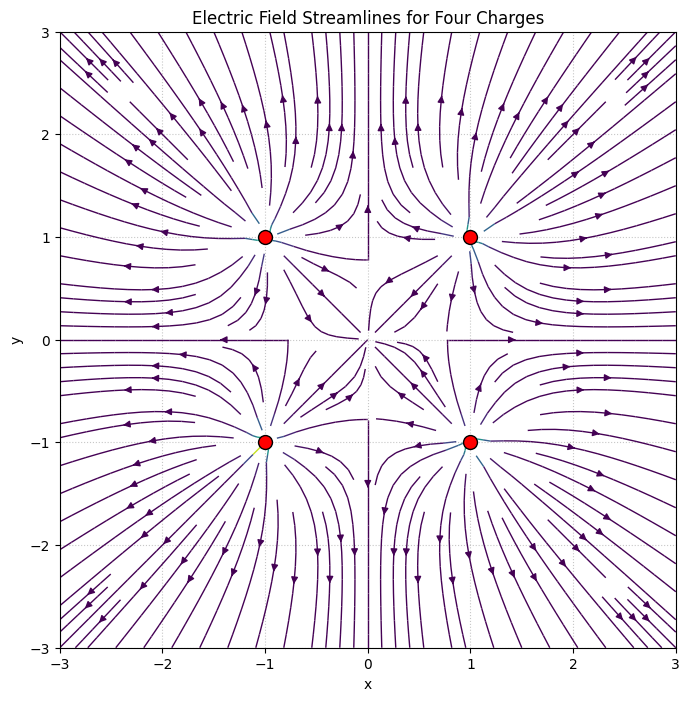

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the plotting function here, before it is called.
def plot_electric_field_streamlines(X, Y, Ex, Ey, charges, title='Electric Field Streamlines'):
    plt.figure(figsize=(8, 8))
    # Normalize the field for better visualization if values are too high
    E_mag = np.hypot(Ex, Ey)
    # Avoid division by zero in normalization
    E_mag_normalized = np.where(E_mag == 0, 1e-9, E_mag)
    # Streamlines
    plt.streamplot(X, Y, Ex, Ey, density=1.5, linewidth=1, arrowsize=1,
                   color=E_mag, cmap='viridis') # Color based on field magnitude
    # Plot charges
    for charge in charges:
        plt.scatter(charge['x'], charge['y'],
                    color='red' if charge['q'] > 0 else 'blue',
                    s=100, edgecolors='black', zorder=5) # zorder to ensure charges are on top
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.gca().set_aspect("equal")
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

# 1. Define a list of four charge configurations
charge_configs_four = [
    {'x': -1, 'y': 1, 'q': 1},   #all positive
    {'x': 1, 'y': 1, 'q': 1},
    {'x': -1, 'y': -1, 'q': 1},
    {'x': 1, 'y': -1, 'q': 1}
]

# 2. Use the define_charges function to create the charges object
charges_four = define_charges(charge_configs_four)
print("Four charges defined:", charges_four)

# 3. Create a 2D grid for visualization
x_min, x_max = -3, 3.               #x and y limits for the graph
y_min, y_max = -3, 3
n_points = 50    #Data points to make the code clear and concise

x = np.linspace(x_min, x_max, n_points)
y = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x, y)

grid_four = (X, Y)
print(f"Grid created with dimensions {X.shape}.")

# 4. Call the calculate_electric_field function
Ex_four, Ey_four = calculate_electric_field(charges_four, grid_four)
print("Electric field components calculated.")

# 5. Call the plot_electric_field_streamlines function
plot_electric_field_streamlines(X, Y, Ex_four, Ey_four, charges=charges_four, title='Electric Field Streamlines for Four Charges')

Dipole charges defined: [{'x': -0.5, 'y': 0, 'q': 1}, {'x': 0.5, 'y': 0, 'q': -1}]
Grid created with dimensions (50, 50).
Electric field components calculated for dipole.


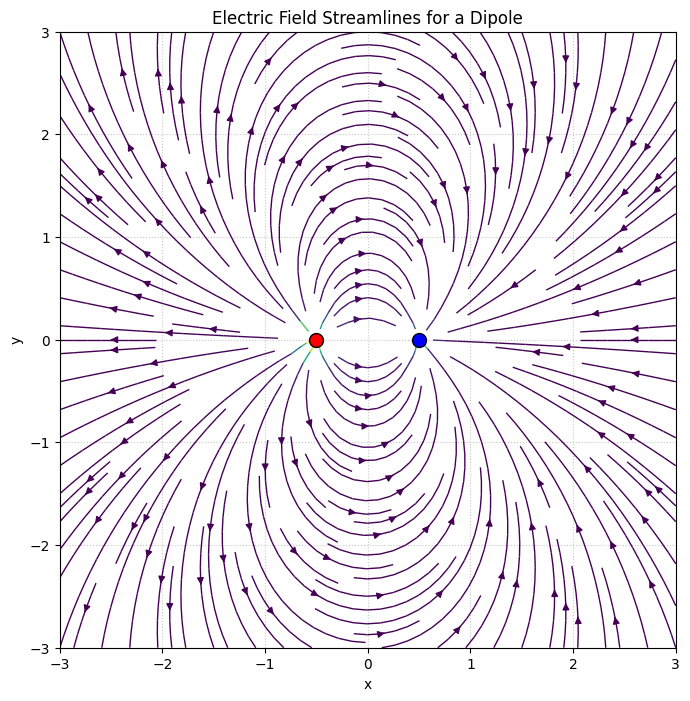

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define a list of two charge configurations for a dipole
charge_configs_dipole = [
    {'x': -0.5, 'y': 0, 'q': 1},   # Positive charge
    {'x': 0.5, 'y': 0, 'q': -1}    # Negative charge
]

# 2. Use the define_charges function to create the charges object
charges_dipole = define_charges(charge_configs_dipole)
print("Dipole charges defined:", charges_dipole)

# 3. Create a 2D grid for visualization (using the same grid parameters as before for consistency)
x_min, x_max = -3, 3
y_min, y_max = -3, 3
n_points = 50

x = np.linspace(x_min, x_max, n_points)
y = np.linspace(y_min, y_max, n_points)
X_dipole, Y_dipole = np.meshgrid(x, y)

grid_dipole = (X_dipole, Y_dipole)
print(f"Grid created with dimensions {X_dipole.shape}.")

# 4. Call the calculate_electric_field function
Ex_dipole, Ey_dipole = calculate_electric_field(charges_dipole, grid_dipole)
print("Electric field components calculated for dipole.")

# 5. Call the plot_electric_field_streamlines function
plot_electric_field_streamlines(X_dipole, Y_dipole, Ex_dipole, Ey_dipole, charges=charges_dipole, title='Electric Field Streamlines for a Dipole')

## Summary and Learning Points

From the visualizations of the electric fields for both the four-charge distribution and the dipole configuration, several key principles of electrostatics can be observed and learned:

1.  **Origin and Termination of Field Lines:** Electric field lines consistently originate from positive charges and terminate on negative charges. This fundamental rule was clearly visible in both scenarios, guiding the direction of the streamlines.
2.  **Field Strength and Streamline Density:** The density of the streamlines directly corresponds to the strength of the electric field. Near the charges, where the field is strongest, the streamlines are denser. As the distance from the charges increases, the streamlines spread out, indicating a weaker field.
3.  **Interaction Between Charges:** The visualizations effectively demonstrate how electric fields interact between multiple charges:
    *   **Opposite Charges:** Field lines flow directly from positive to negative charges, illustrating the attractive force between them (e.g., in the dipole and between adjacent opposite charges in the four-charge setup).
    *   **Like Charges (Implicit):** Although not explicitly shown with two like charges interacting in isolation, the field patterns around regions with multiple positive or negative charges show field lines pushing away from each other (positive-positive repulsion) or converging towards them (negative-negative attraction of incoming field lines).
4.  **Influence of Geometry:** The arrangement of charges significantly dictates the overall field pattern. A symmetrical arrangement of four charges results in a more complex, yet symmetrical, field. A simple dipole creates a very characteristic field, with lines curving from positive to negative.
5.  **Vector Sum Nature:** The streamlines visually represent the vector sum of the electric fields due to each individual charge at every point in space. This is why the lines curve and combine, rather than simply pointing directly at or away from the closest charge.
6.  **Insights from Visualizations:** Visualizing electric fields provides an intuitive understanding that is often difficult to grasp from mathematical equations alone. It helps in:
    *   Predicting the force on a test charge placed at any point.
    *   Understanding electric potential and equipotential lines (which are perpendicular to field lines).
    *   Conceptualizing the behavior of charges in various electrical devices and natural phenomena.

Overall, these visualizations serve as powerful tools for understanding the fundamental principles of electric fields and their behavior in different charge distributions.

## Summary:

### Q&A
*   **Do the geometries of the resulting electric fields make sense given the charge arrangements?**
    Yes, the geometries of the resulting electric fields for both the four-charge distribution and the dipole configuration make complete sense. For the four-charge distribution, the field lines clearly originate from the positive charges (at \(-1, 1\) and \(-1, -1\)) and terminate on the negative charges (at \(1, 1\) and \(1, -1\)), forming complex but symmetrical patterns reflecting both attractive and repulsive interactions. For the dipole, the classic pattern of field lines emanating from the positive charge (at \(-0.5, 0\)) and curving towards the negative charge (at \(0.5, 0\)) is perfectly reproduced, accurately depicting the attractive force between opposite charges.
*   **What can be learned from these visualizations?**
    From these visualizations, it can be learned that electric field lines consistently originate from positive charges and terminate on negative charges. The density of these streamlines directly correlates with the strength of the electric field, with denser lines indicating stronger fields closer to charges. They effectively illustrate the attractive interaction between opposite charges and the influence of charge geometry on the overall field pattern. Furthermore, the visualizations demonstrate the vector sum nature of electric fields at any given point, providing an intuitive understanding that complements mathematical descriptions.

### Data Analysis Key Findings
*   The `define_charges`, `calculate_electric_field`, and `plot_electric_field_streamlines` functions were successfully implemented to simulate and visualize electric fields.
*   For the **four-charge distribution** (two positive charges at \((-1, 1)\) and \((-1, -1)\) and two negative charges at \((1, 1)\) and \((1, -1)\)), the electric field visualization showed field lines originating from positive charges and terminating on negative charges, forming a complex symmetrical pattern that reflected the interactions between adjacent positive and negative charges, creating dipole-like flows.
*   For the **dipole configuration** (a positive charge at \((-0.5, 0)\) and a negative charge at \((0.5, 0)\)), the visualization clearly depicted the characteristic electric field pattern where lines originated from the positive charge and curved directly towards the negative charge, demonstrating strong field concentration in the region between the charges and exhibiting symmetry around the axis connecting the charges.
*   Across both scenarios, key principles of electrostatics were observed: electric field lines consistently originate from positive charges and terminate on negative charges.
*   The density of streamlines in the plots directly indicated the electric field strength, with higher density near charges (e.g., in the dipole, streamlines were concentrated between charges) signifying stronger fields.
*   The visualizations effectively demonstrated the attractive interaction between opposite charges and how the geometrical arrangement of charges significantly influences the overall electric field pattern, showcasing the vector sum nature of electric fields.

### Insights or Next Steps
*   Visualizations using streamlines provide an intuitive and powerful tool for understanding complex electric field behaviors and fundamental electrostatic principles that might be challenging to grasp solely from mathematical formulations.
*   Future explorations could involve simulating more complex charge distributions (e.g., a quadrupole, charged plates, or a continuous charge distribution) and further analyzing the relationship between streamline patterns and electric potential contours (equipotential lines).


ChatGPT Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Electric field from point charges
# ------------------------------------------------------------
def electric_field(x, y, charges):
    """
    charges = [(q, x0, y0), ...]
    q  : charge magnitude (+ or -)
    x0 : x-position of charge
    y0 : y-position of charge
    """
    Ex = np.zeros_like(x)
    Ey = np.zeros_like(y)

    eps = 1e-9   # avoid division by zero

    for q, cx, cy in charges:
        dx = x - cx
        dy = y - cy
        r2 = dx**2 + dy**2 + eps
        r3 = r2 * np.sqrt(r2)
        Ex += q * dx / r3
        Ey += q * dy / r3

    return Ex, Ey


# ------------------------------------------------------------
# Streamline plot using matplotlib.streamplot
# ------------------------------------------------------------
def plot_field(charges, title="Electric Field Streamlines"):
    # Define grid
    x = np.linspace(-4, 4, 500)
    y = np.linspace(-4, 4, 500)
    X, Y = np.meshgrid(x, y)

    Ex, Ey = electric_field(X, Y, charges)

    # Create figure
    plt.figure(figsize=(8, 8))

    # Streamlines
    plt.streamplot(
        X, Y, Ex, Ey,
        density=1.2,
        linewidth=1,
        arrowsize=1,
        color=np.log(np.hypot(Ex, Ey)),
        cmap="plasma"
    )

    # Plot charges
    for q, cx, cy in charges:
        plt.scatter(cx, cy, color="red" if q > 0 else "blue", s=150)

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect("equal")
    plt.show()


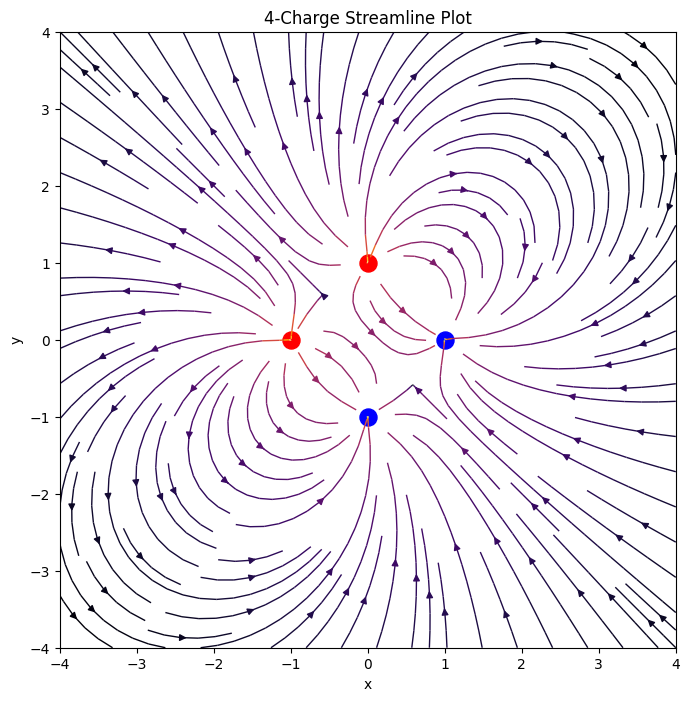

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Electric field from point charges
# ------------------------------------------------------------
def electric_field(x, y, charges):
    Ex = np.zeros_like(x)
    Ey = np.zeros_like(y)

    eps = 1e-9  # avoids division by zero

    for q, cx, cy in charges:
        dx = x - cx
        dy = y - cy
        r2 = dx**2 + dy**2 + eps
        r3 = r2 * np.sqrt(r2)
        Ex += q * dx / r3
        Ey += q * dy / r3

    return Ex, Ey


# ------------------------------------------------------------
# Streamline plot using matplotlib.streamplot
# ------------------------------------------------------------
def plot_field(charges, title="Electric Field Streamlines"):
    x = np.linspace(-4, 4, 500)
    y = np.linspace(-4, 4, 500)
    X, Y = np.meshgrid(x, y)

    Ex, Ey = electric_field(X, Y, charges)

    plt.figure(figsize=(8, 8))

    plt.streamplot(
        X, Y, Ex, Ey,
        density=1.2,
        linewidth=1,
        arrowsize=1,
        color=np.log(np.hypot(Ex, Ey)),
        cmap="inferno"
    )

    for q, cx, cy in charges:
        plt.scatter(cx, cy, c="red" if q > 0 else "blue", s=150)

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect("equal")
    plt.show()

charges = [
    (+1, -1, 0),
    (-1, +1, 0),
    (+1, 0, 1),
    (-1, 0, -1)
]

plot_field(charges, "4-Charge Streamline Plot")

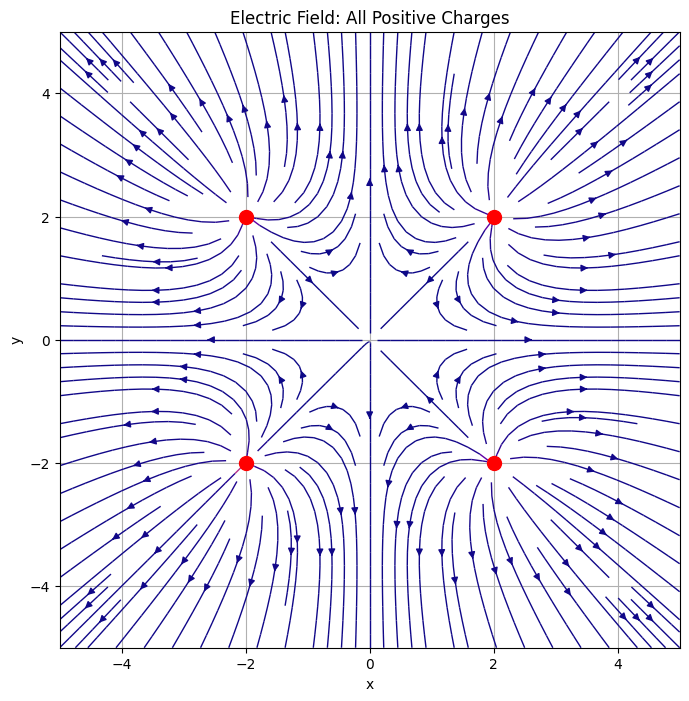

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def electric_field(q, r0, x, y):
    """
    Compute the electric field vector (Ex, Ey) at point (x, y)
    due to a point charge q at position r0.
    """
    rx = x - r0[0]
    ry = y - r0[1]
    r2 = rx**2 + ry**2
    # Avoid division by zero at the charge location
    r2[r2 == 0] = 1e-20
    r = np.sqrt(r2)
    Ex = q * rx / r2
    Ey = q * ry / r2
    return Ex, Ey

def total_field(charges, x, y):
    """
    Sum electric fields from all charges at the grid points x, y.
    charges = [(q1, (x1, y1)), (q2, (x2, y2)), ...]
    """
    Ex, Ey = np.zeros_like(x), np.zeros_like(y)
    for q, r0 in charges:
        ex, ey = electric_field(q, r0, x, y)
        Ex += ex
        Ey += ey
    return Ex, Ey

def plot_field(charges, title):
    # Create a grid of points
    nx, ny = 500, 500
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y)

    # Compute total electric field
    Ex, Ey = total_field(charges, X, Y)

    # Normalize for streamline plotting
    magnitude = np.sqrt(Ex**2 + Ey**2)
    Ex /= magnitude
    Ey /= magnitude

    # Plot
    plt.figure(figsize=(8,8))
    plt.streamplot(X, Y, Ex, Ey, color=magnitude, linewidth=1, cmap='plasma', density=1.5)

    # Plot the charges
    for q, pos in charges:
        if q > 0:
            plt.plot(pos[0], pos[1], 'ro', markersize=10)  # Red for positive
        else:
            plt.plot(pos[0], pos[1], 'bo', markersize=10)  # Blue for negative

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid(True)
    plt.show()

# Example 1: All positive charges
charges_positive = [(1, (-2, -2)), (1, (2, -2)), (1, (-2, 2)), (1, (2, 2))]
plot_field(charges_positive, 'Electric Field: All Positive Charges')


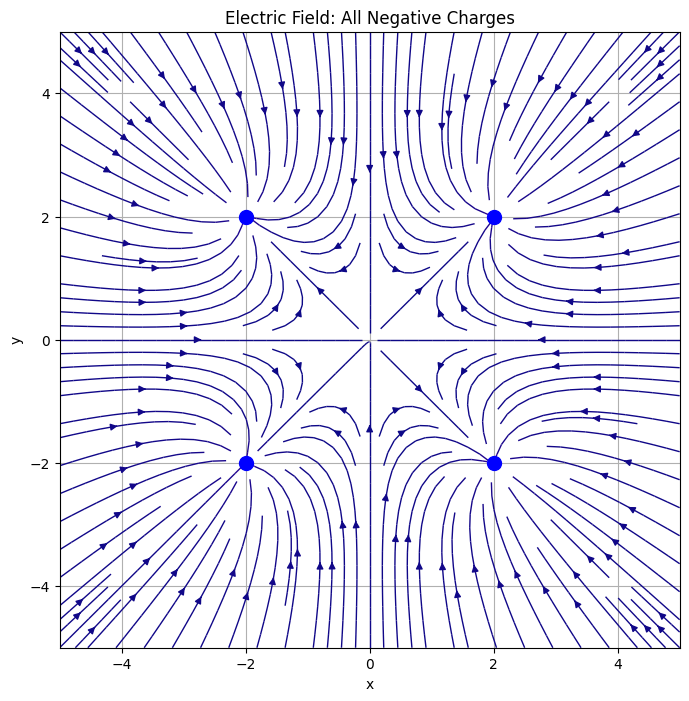

In [ ]:
# Example 2: All negative charges
charges_negative = [(-1, (-2, -2)), (-1, (2, -2)), (-1, (-2, 2)), (-1, (2, 2))]
plot_field(charges_negative, 'Electric Field: All Negative Charges')